In [1]:
import scipy.io
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, integrate
import h5py

data = scipy.io.loadmat('D:\\VAE Experiment\\DEAP\\decoded_eegs_2vae\\decoded_eegs_2vae_sub10_latentdim15.mat')['decoded_eegs']
data = data.T
print(data.shape)
one_data = data


norm_data = h5py.File('D:\\Processed DEAP DATA\\normalize_zscore\\sub10.mat')['zscore_data'][0:32,:]
print(norm_data.shape) 



mat = scipy.io.loadmat('D:/DEAP DATA/s10.mat')['data']
pure = mat[0]



biosemi32 = mne.channels.make_standard_montage('biosemi32')
info = mne.create_info(ch_names=biosemi32.ch_names, ch_types='eeg', sfreq=128)
raw = mne.EvokedArray(norm_data, info) 



print(norm_data.shape)
print(np.amax(norm_data)) # max value
print(np.amin(norm_data)) # min value


(32, 322560)
(32, 322560)
(32, 322560)
28.7133520097828
-27.376178673273802


Creating RawArray with float64 data, n_channels=32, n_times=322560
    Range : 0 ... 322559 =      0.000 ...  2519.992 secs
Ready.


Using matplotlib as 2D backend.


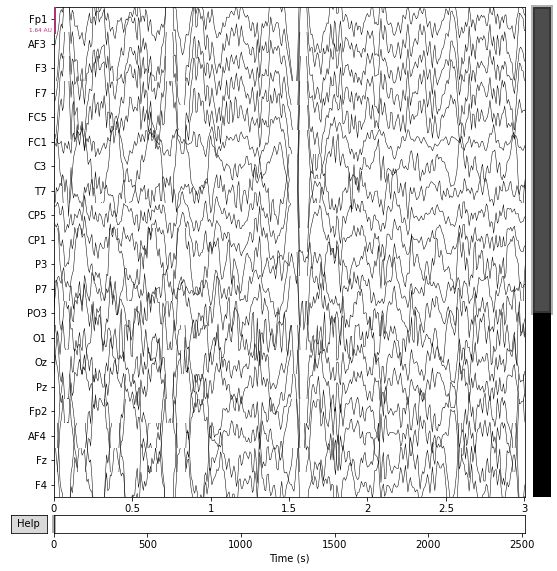

In [2]:
info_ = mne.create_info(ch_names= ['Fp1','AF3','F3','F7','FC5','FC1','C3','T7','CP5','CP1','P3','P7','PO3','O1','Oz','Pz','Fp2','AF4','Fz','F4','F8','FC6','FC2','Cz','C4','T8','CP6','CP2','P4','P8','PO4','O2'], sfreq=128)
raw_ = mne.io.RawArray(norm_data, info_, first_samp=0, copy='auto', verbose=None);
raw_.plot(duration=3, n_channels=20);

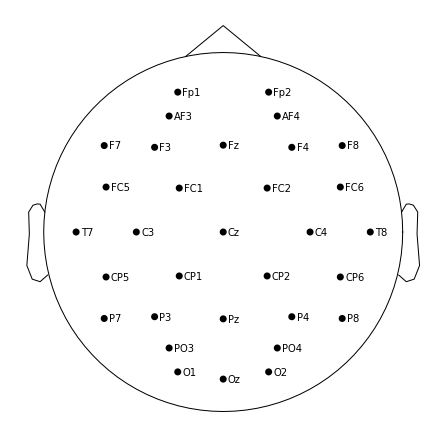

In [3]:
biosemi32.plot(kind='topomap', show_names=True);

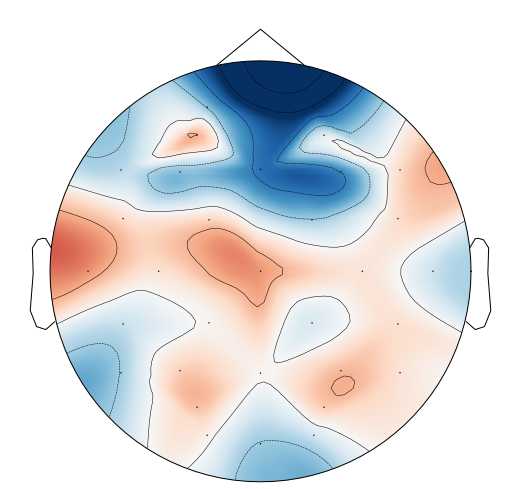

(<matplotlib.image.AxesImage at 0x1d0c5a82820>,
 <matplotlib.contour.QuadContourSet at 0x1d0c5a82ac0>)

In [4]:
raw = raw.set_montage(biosemi32)
raw_data_mean = np.mean(raw.data, axis=1)
fig, ax = plt.subplots(figsize=(10, 8))
mne.viz.plot_topomap(raw_data_mean, raw.info, axes=ax, show=True)


In [5]:

raw = raw.set_montage(biosemi32)
mne.viz.plot_topomap(raw.data[:, 0], raw.info, show=False) # time step 0

(<matplotlib.image.AxesImage at 0x1d0c5b03d00>,
 <matplotlib.contour.QuadContourSet at 0x1d0c5b162e0>)

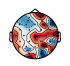

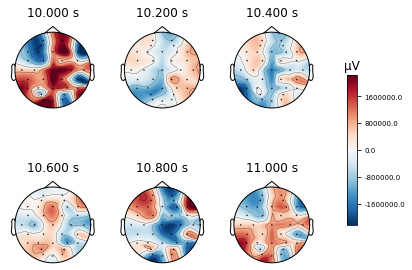

In [6]:
times = np.arange(10.00, 11.2, 0.2) # from 30s to 30.2s
raw.plot_topomap(times, ch_type='eeg', time_unit='s', ncols=3, nrows='auto');


In [7]:
print(np.amax(one_data)) # max value
print(np.amin(one_data)) # min value
print(np.amax(norm_data)) # max value
print(np.amin(norm_data)) # min value

18.051249
-16.816795
28.7133520097828
-27.376178673273802


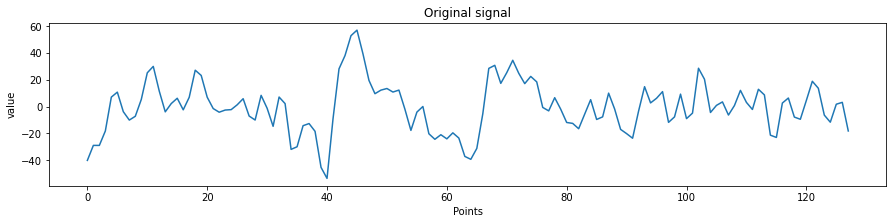

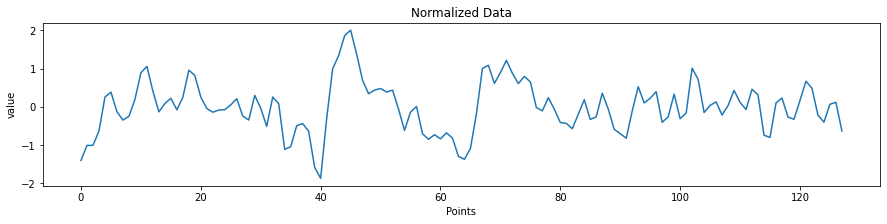

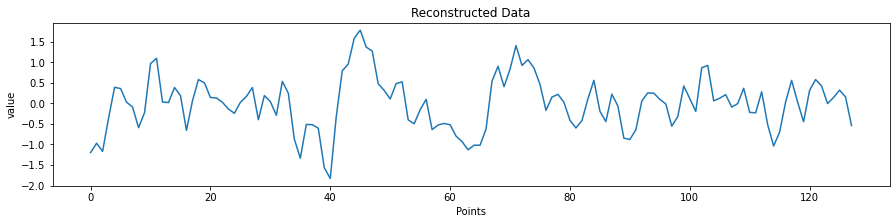

In [8]:
nth = 10

plt.figure(figsize=(15, 3))
plt.plot(pure[0][nth*128:nth*128+128]) # first trial first channel
plt.title("Original signal")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(norm_data[0][nth*128:nth*128+128]) # first trial first channel
plt.title("Normalized Data")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(one_data[0][nth*128:nth*128+128])
plt.title("Reconstructed Data")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()




In [9]:
# original 128 points signal (1 second)
plt.plot(raw_data_mean[0][0][:128])
plt.title("Source signal")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()

# visualise hanning window
window = np.hanning(128)
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

# signal with hanning window
plt.plot(raw_data_mean[0][0][:128]*window)
plt.title("Source signal with Hanning window")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()

# visualise PSD feature
# theta waves (4–7 Hz), alpha waves (8–13Hz), beta waves (14–30 Hz) and gamma waves (31–50 Hz)
f, Pxx_den = signal.welch(mat[0][:128], fs=128, window='hann', nperseg = 128, noverlap=64)
plt.plot(f, Pxx_den)
plt.fill_between(f[4:8], Pxx_den[4:8], alpha = 0.3, color='red')
plt.fill_between(f[8:14], Pxx_den[8:14], alpha = 0.3, color='orange')
plt.fill_between(f[14:31], Pxx_den[14:31], alpha = 0.3, color='yellow')
plt.fill_between(f[31:51], Pxx_den[31:51], alpha = 0.3, color='green')
plt.ylim()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()

IndexError: invalid index to scalar variable.

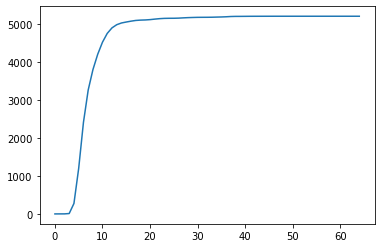

Frequency band power of first channel of first frame:  [2985.36309519 1178.82260403  147.90909606   27.98097557]


In [ ]:
# use integration to calculate frequency band power
x = f
y = Pxx_den
y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int)
plt.show()

band_power = np.array([y_int[7]-y_int[4],y_int[13]-y_int[8],y_int[30]-y_int[14],y_int[51]-y_int[31]])
print("Frequency band power of first channel of first frame: ", band_power)